In [ ]:
# ===========================================
#   PDF por d log10(lambda5) — área = 1
#   Compatible con LaTeX (sin Unicode)
# ===========================================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Configuración LaTeX segura ---
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams.update({
    "axes.titlesize": 18,
    "axes.labelsize": 14,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
})

# --- Ruta base del proyecto y nombre de columna ---
BASE_DIR = "/home/js.sanchezl1/Proyecto_Teorico"
COL_LAMBDA5 = "MINPAR lambda5Input"


# -------------------------
#   Funciones auxiliares
# -------------------------

def filtra_pos_finitos(x):
    """Devuelve solo valores positivos y finitos."""
    x = np.asarray(x, dtype=float)
    x = x[np.isfinite(x)]
    return x[x > 0]

def carga_columna_lambda5(path_csv):
    """Carga del CSV la columna lambda5."""
    if not os.path.isfile(path_csv):
        raise FileNotFoundError(f"No se encontró: {path_csv}")
    df = pd.read_csv(path_csv, sep=';')
    if COL_LAMBDA5 not in df.columns:
        raise KeyError(f"El archivo no tiene la columna '{COL_LAMBDA5}'")
    return np.asarray(df[COL_LAMBDA5])


# -------------------------
#   PDF por década
# -------------------------

def etiqueta_lambda(area):
    """Etiqueta compatible con LaTeX (sin Unicode)."""
    return fr"$\lambda_5$ (\'{{a}}rea $\approx {area:.6f}$)"


def plot_pdf_por_decada_superpuesto(csv_paths, labels, nbins=30, titulo=None, outname=None):
    """
    Superpone varias PDFs normalizadas (dP/d log10) en un mismo gráfico.
    
    Parámetros:
    - csv_paths : lista de rutas a archivos CSV
    - labels    : lista de etiquetas LaTeX para la leyenda
    - nbins     : número de bins en log10
    - titulo    : título del gráfico
    - outname   : nombre del archivo a guardar
    """
    plt.figure()

    for path_csv, lab in zip(csv_paths, labels):

        x = filtra_pos_finitos(carga_columna_lambda5(path_csv))
        if x.size == 0:
            print(f"[ADVERTENCIA] El archivo {path_csv} no tiene datos válidos.")
            continue

        # Transformación a log10
        t = np.log10(x)
        tmin, tmax = t.min(), t.max()

        # Bins uniformes en log10
        edges_t = np.linspace(tmin, tmax, nbins)
        counts, edges_t = np.histogram(t, bins=edges_t)
        widths_t = np.diff(edges_t)
        N = x.size

        pdf_t = counts / (N * widths_t)
        area = np.sum(pdf_t * widths_t)

        # Para graficar en eje X usamos λ5
        x_plot = 10**edges_t[:-1]

        # Etiqueta
        label = rf"{lab}"

        # Graficar
        plt.step(x_plot, pdf_t, where='post', linewidth=2, label=label)

    # Escalas y etiquetas
    plt.xscale('log')
    plt.xlabel(r"Valor de $\lambda_5$")
    plt.ylabel(r"Distribución de $\lambda_5$")

    if titulo is None:
        titulo = r"Distribuci\'{o}n comparativa de $\lambda_5$ (por d$\log_{10}$)"

    plt.title(titulo)
    plt.legend()
    plt.tight_layout()

    # Guardar
    outdir = os.path.join(BASE_DIR, "Constraint5")
    os.makedirs(outdir, exist_ok=True)
    if outname is None:
        outname = "lambda5_superpuesto_por_decada.png"
    outpath = os.path.join(outdir, outname)

    plt.savefig(outpath, dpi=300, bbox_inches="tight")
    plt.show()

    print(f"Figura guardada en: {outpath}")

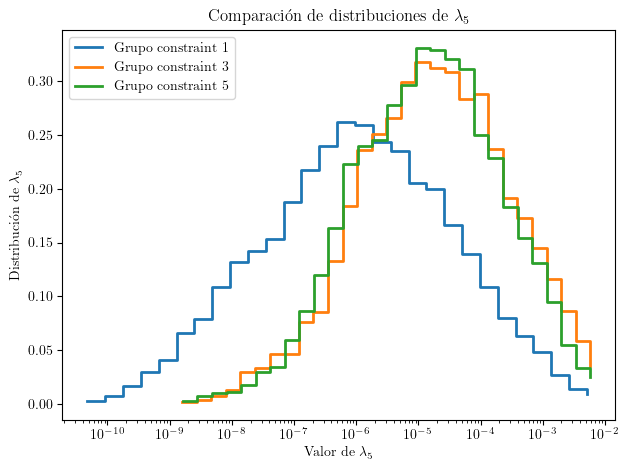

Figura guardada en: /home/js.sanchezl1/Proyecto_Teorico/Constraint5/lambda5_templates_1_3_5_comparacion.png


In [10]:
csvs = [
    os.path.join(BASE_DIR, "template1.csv"),
    os.path.join(BASE_DIR, "template3.csv"),
    os.path.join(BASE_DIR, "template5.csv")
]

labels = [
    r"Grupo constraint 1",
    r"Grupo constraint 3",
    r"Grupo constraint 5"
]

plot_pdf_por_decada_superpuesto(
    csv_paths=csvs,
    labels=labels,
    nbins=30,
    titulo=r"Comparaci\'{o}n de distribuciones de $\lambda_5$",
    outname="lambda5_templates_1_3_5_comparacion.png"
)
